<a href="https://colab.research.google.com/github/mvince33/Coding-Dojo/blob/main/ds_salaries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
file_url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vTdOf3VNJf4ZWJ3ZtViZTaZlheOTDGX6vdhYyhwXByFPJDTeCtpy5yG-yMqqG5sCvpxz6frIzF7qY1J/pub?gid=1813708075&single=true&output=csv'
df = pd.read_csv(file_url)
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [4]:
# Check for duplicates and missing values.
df.duplicated().sum()
df.isna().sum()

# It's probably good practice to do this even 
# when getting a nice data set from someplace
# like Kaggle

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [5]:
# Get rid of the unnamed column
df.drop(columns = 'Unnamed: 0', inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 52.3+ KB


In [6]:
# Filter the data to only include entry level, full time jobs in the US
filter = (df['experience_level'] == 'EN') & (df['employment_type'] == 'FT') & (df['company_location'] == 'US')
filtered_df = df.loc[filter, ['salary_in_usd', 'job_title', 'work_year']]

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


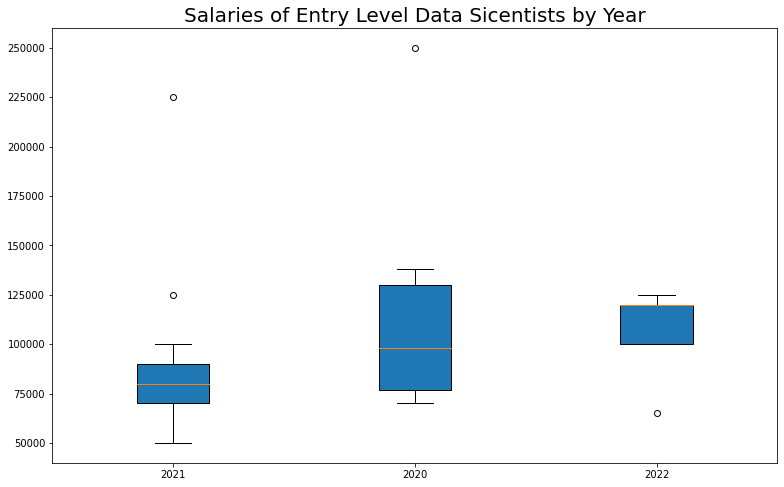

In [8]:
# Construct a boxplot of salaries by year
salaries_by_year = [filtered_df.loc[filtered_df['work_year'] == year, 'salary_in_usd'] for year in filtered_df['work_year'].value_counts().index]

plt.figure(figsize = (13, 8));
plt.boxplot(salaries_by_year, 
            labels = filtered_df['work_year'].value_counts().index,
            patch_artist = True);
plt.title('Salaries of Entry Level Data Sicentists by Year', fontsize = 20);

In [ ]:
# Average salaries of entry level data scientists by job type
